In [321]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import time

In [322]:
# partice properties and constants
scale = 1e-9
mass = 9.109e-31
hbar = 6.626e-34
charge = -1.602e-19
N = 128

In [323]:
def lanczos(v0,m,q):
    #Writing Lanczos Algorithm
    #Initial Iteration
    w = []
    beta = [0]
    v = [v0]
    wp = []
    alpha = []
    w0p = Hx(v0, q, phi)
    wp.append(w0p)
    alpha0 = np.conj(w0p.T) @ v0
    alpha.append(alpha0)
    w0 = w0p - alpha0 * v0
    w.append(w0)
    #Repeated Iteration
    for j in range(1,m):
        betaj = np.linalg.norm(w[j-1])
        beta.append(betaj)
        #print("beta" + str(j) + ": " + str(betaj))
        vj = w[j-1]/beta[j]
        v.append(vj)
        wjp = Hx(v[j], q, phi)
        wp.append(wjp)
        alphaj = np.conj(wp[j].T) @ v[j]
        alpha.append(alphaj)
        wj = wp[j] - alpha[j] * v[j] - beta[j] * v[j-1]
        w.append(wj)   
        
    v = np.array(v)
    V = v.T
    Teigenvals, Teigenvecs = eigh_tridiagonal(alpha,beta[1:]) #tridiagonal matrix with alphas on main diagonal and betas on adjacent ones
    groundstate_eigenval = Teigenvals[0]
    groundstate_eigenvec = Teigenvecs[:,0]
    print(groundstate_eigenval)
    return V @ groundstate_eigenvec   
    
    
    
    

In [324]:
xy1 = np.mgrid[0:N,0:N]
xy = xy1.reshape(2,-1)
xp = np.roll(xy1,-1,axis=1).reshape(2,-1)
xm = np.roll(xy1,1,axis=1).reshape(2,-1)
yp = np.roll(xy1,-1,axis=2).reshape(2,-1)
ym = np.roll(xy1,1,axis=2).reshape(2,-1)

def Hx(x,q,phi):
    #Create discrete version of Hamiltonian operator
    x = x.reshape(N,-1)
    ax = np.zeros(x.shape)

    #Use discrete schrodinger equation
    ax[xy[0,:],xy[1,:]] = -hbar/(2*mass*scale*scale)*(-4*x[xy[0,:],xy[1,:]] + x[xp[0,:],xp[1,:]] + x[xm[0,:],xm[1,:]] +  x[yp[0,:],yp[1,:]] + x[ym[0,:],ym[1,:]])

    #reset boundary
    ax[0,:] = 0
    ax[:,0] = 0
    ax[N-1,:] = 0
    ax[:,N-1] = 0


    return ax.flatten()

    

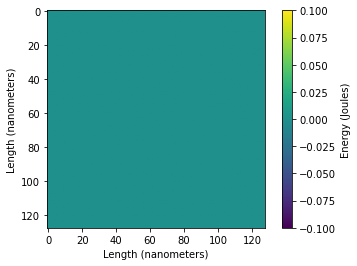

In [325]:
#Creating potential
phi = np.zeros((N,N))
#Creating grid
X=np.linspace(0,N-1,N)
Y=np.linspace(0,N-1,N)
X=X.astype(int)
Y=Y.astype(int)

                   
Z = charge * phi[X][Y]
fig, ax = plt.subplots()
#Plot Potential
plt.imshow(Z)
cbar = plt.colorbar()
cbar.set_label("Energy (Joules)")
plt.xlabel("Length (nanometers)")
plt.ylabel("Length (nanometers)")
plt.show()


In [326]:
#Create starting v0
v0 = np.ones((N,N))

for i in range(N):
    for j in range(N):
        if(i == 0 or i == N-1 or j == 0 or j == N-1):
            v0[i][j] = 0
            
v0 = v0/np.linalg.norm(v0)
#fig, ax = plt.subplots()
#Plot Potential
#plt.imshow(v0)
#plt.colorbar()
#plt.show()

v0 = v0.flatten()


In [327]:
iterations = 300
t1 = time.time()
for i in range(iterations):
    #input previous v0 into lanczos algorithm
    result = lanczos(v0,10,charge)
    #normalize result
    v0 = result/np.linalg.norm(result)
t2 = time.time()
print("Time taken: " + str(round(t2-t1,3)) + " seconds.")

1561423267332.4822
998635534851.7711
815317666212.8893
715025504418.3516
651234037401.0842
606664114715.3284
573964390329.8723
548998192208.00366
529495769491.13336
513970350862.14185
501475942303.40594
491335272420.95337
483064947893.0104
476296782999.92053
470746463125.85236
466189189134.0215
462444013068.5854
459365103829.6803
456832962759.04156
454750412470.23834
453037306639.33453
451628196342.3704
450469008650.73267
449515496502.5976
448731102961.3287
448085881107.72485
447555101322.60706
447118491612.51166
446759321524.08734
446463869642.2696
446220817566.0032
446020878947.51636
445856396963.4594
445721087396.02094
445609770457.6002
445518193699.1684
445442852919.3716
445380870545.3225
445329875802.06586
445287921423.2091
445253403342.8184
445225003777.3149
445201637331.4635
445182412165.42224
445166593785.0666
445153578581.4692
445142869478.5748
445134057921.1369
445126807482.86115
445120841615.02655
445115932604.767
445111893247.265
445108569403.1554
445105834340.7171
44510358

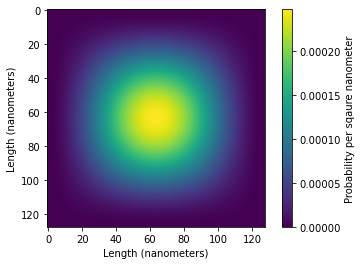

In [328]:
wavefunction = np.reshape(v0, (N,N))
X=np.linspace(0,N-1,N)
Y=np.linspace(0,N-1,N)
X=X.astype(int)
Y=Y.astype(int)
                   
wavefunction = wavefunction[X][Y]
fig, ax = plt.subplots()
#plot wavefunction squared to give probability plot
probability = wavefunction**2
norm = np.sum(probability)
probability = probability / norm
plt.imshow(probability)
cbar = plt.colorbar()
cbar.set_label("Probability per sqaure nanometer")
plt.xlabel("Length (nanometers)")
plt.ylabel("Length (nanometers)")
plt.show()

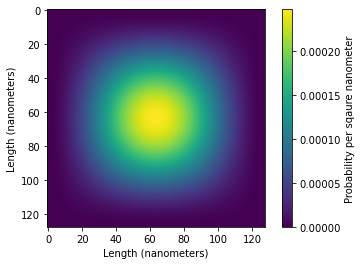

In [329]:
WF = np.zeros((N,N))
pi = np.pi
for i in range(N):
    for j in range(N):
        WF[i][j] = 2/(N-1)/scale * np.sin(pi*i*scale/(N-1)/scale) * np.sin(pi*j*scale/(N-1)/scale)
        #print(WF[i][j])
actual = WF**2
Norm = np.sum(actual)
actual =  actual / Norm
plt.imshow(actual)
cbar = plt.colorbar()
cbar.set_label("Probability per sqaure nanometer")
plt.xlabel("Length (nanometers)")
plt.ylabel("Length (nanometers)")
plt.show()

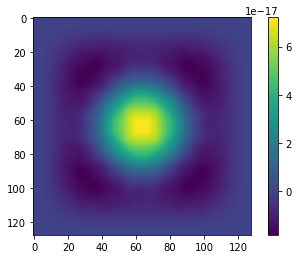

In [330]:
diff = actual - probability
plt.imshow(diff)
plt.colorbar()
plt.show()